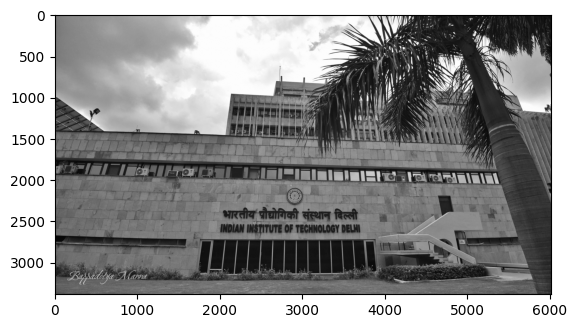

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('camp8.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.show()

In [2]:
U, S, Vt = np.linalg.svd(image)
U.shape, S.shape, Vt.shape

((3384, 3384), (3384,), (6016, 6016))

In [3]:
# First and last 10 singular values
S[:10], S[-10:]

(array([554446.8139516 , 120412.93396826, 107082.82783944,  69651.19102334,
         44935.59486736,  41856.74074842,  35362.51791907,  33349.48029102,
         30386.95080036,  27744.75728038]),
 array([5.93910747, 5.91139043, 5.85832242, 5.83734949, 5.77878457,
        5.74338238, 5.67640161, 5.55831013, 5.44356607, 5.26089746]))

As seen above, we can load in an image and represent it as a matrix of integers, with each integer representing the brightness of the pixel in its position.

There are also 360 singular values, with the smallest and largest being several orders of magnitude apart. This indicates that there are many principal directions that have minimal impact on the image, and the $\sigma_i u_i v_i^\mathsf{T}$ terms corresponding to those values can likely be removed. Let's what happens when we remove all but the first component.

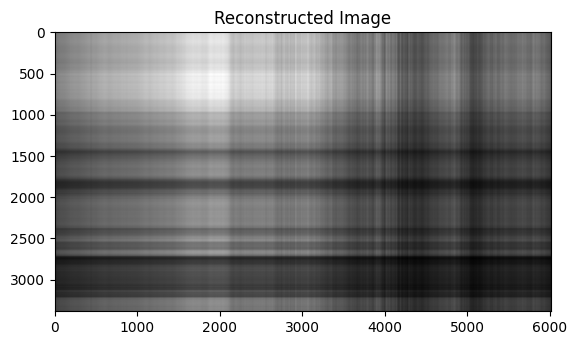

In [4]:
reconstructed_image = np.matrix(U[:,:1]) * np.diag(S[:1]) * np.matrix(Vt[:1,:])
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

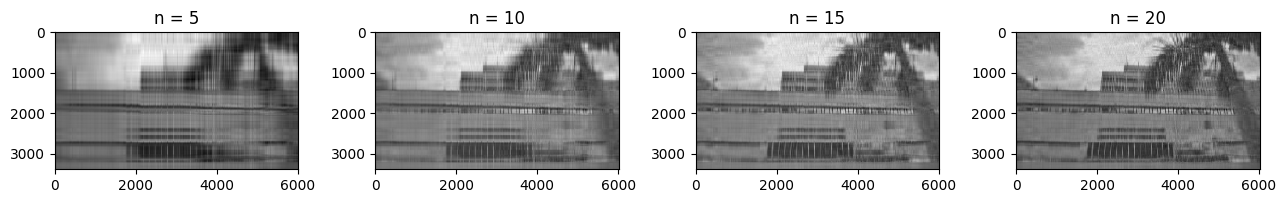

In [5]:
plt.figure(figsize=(16,4))

start, end, step = 5, 25, 5
for i in range(start, end, step):
    plt.subplot(1, (end - start) // step + 1, (i - start) // step + 1)
    reconstructed = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
    plt.imshow(reconstructed, cmap='gray')
    plt.title('n = %s' % i)

plt.tight_layout()
plt.show()

As we increase the number of singular values used in the reconstruction, the image is much clearer and we can clearly see the original image within the first 20 singular values. In the code below you can change the value of `n` to change the compression rate of the image.

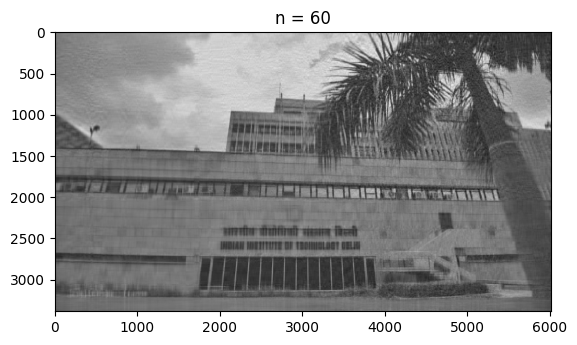

In [6]:
n = 60
reconstructed = np.matrix(U[:, :n]) * np.diag(S[:n]) * np.matrix(Vt[:n, :])
plt.imshow(reconstructed, cmap='gray')
plt.title('n = %s' % n)
plt.show()

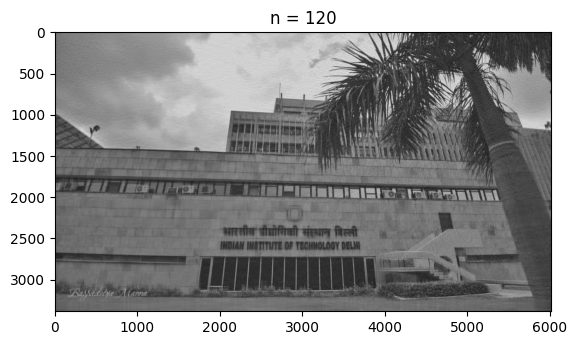

In [7]:
n = 120
reconstructed = np.matrix(U[:, :n]) * np.diag(S[:n]) * np.matrix(Vt[:n, :])
plt.imshow(reconstructed, cmap='gray')
plt.title('n = %s' % n)
plt.show()